In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [19]:
filename = '/content/drive/My Drive/Colab Notebooks/data.xlsx'
df = pd.read_excel(filename)
df.head()

,의견
0,희망하는 위치와 괜찮은 가격대여서
1,희망 직장 근처에서 살고싶어서
2,흥미를 느껴서
3,흑석 쉐어하우스를 찾던 도중에 시설도 좋아보이고 가격도 합리적인 것 같아 투어 신청...
4,휴학후 자격증 공부를 위해 학원을 다니게 되어 입주 신청을 하게 되었습니다.


In [20]:
#데이터 타입과 구조 알아보기
print('데이터의 구조는[행,열] :',df.shape)
print('데이터의 타입은 :\n',df.dtypes)
print('데이터의 칼럼은 :',df.columns)

데이터의 구조는[행,열] : (19551, 1)
데이터의 타입은 :
 의견    object
dtype: object
데이터의 칼럼은 : Index(['의견'], dtype='object')


In [21]:
#칼럼에 비어있는 데이터 확인하기 ( 결측치 확인 )
df.isna().sum()

의견    1
dtype: int64

In [22]:
df.columns

Index(['의견'], dtype='object')

In [23]:
df.rename(columns={'data': 'date'}, inplace=True)

In [24]:
df.columns

Index(['의견'], dtype='object')

In [26]:
import re 

insta_tags=[]

for i in range(802):
    tags = re.findall('[A-Za-z0-9가-힣]+',df['의견'][i])
    for item in tags:
        insta_tags.append(item)
    

In [42]:
insta_tags

AttributeError: ignored

In [59]:
stop_words = ['되었습니다' , '신청하게', '너무', '것', '있는', '수','집을','더','곳을',
              '있어서','같아서','싶습니다','잘','싶어서','있습니다','후','신청합니다','방을','합니다','살','중','그리고','데일리',
              '그리고','쉐어하우스','것보다','신청했습니다','있을','우주','알게','생활을','쉐어하우스를','쉐어하우스가','하고','사는','공간이','사는','하고',
              '하게','알아보다가','되었고', '찾게','셰어하우스','쉐어하우스에서','지낼','것이','다른','찾게','셰어하우스를','회사와','회사가', '집이','많이','때문에','때','우주를']
insta_tags = [word for word in insta_tags if word not in stop_words]

from collections import Counter 
count = Counter(insta_tags) 
common_tag_100 = count.most_common(50)

In [58]:
common_tag_100

[('혼자', 167),
 ('회사', 120),
 ('회사와', 70),
 ('함께', 57),
 ('서울에서', 38),
 ('같이', 36),
 ('좋은', 36),
 ('가까운', 35),
 ('혼자서', 33),
 ('사람들과', 30),
 ('회사가', 30),
 ('서울에', 28),
 ('혼자사는', 27),
 ('휴학', 26),
 ('혼자살기', 24),
 ('외롭고', 23),
 ('입주', 21),
 ('집이', 21),
 ('근처에', 21),
 ('살아보고', 21),
 ('무섭고', 21),
 ('가깝고', 20),
 ('멀어서', 20),
 ('많이', 19),
 ('때문에', 19),
 ('살면', 19),
 ('위해', 18),
 ('동안', 18),
 ('살고', 18),
 ('때', 18),
 ('근처로', 18),
 ('가까워서', 18),
 ('휴학을', 17),
 ('우주를', 17),
 ('여러', 17),
 ('근처', 17),
 ('사람의', 17),
 ('같아', 16),
 ('되어', 16),
 ('회사랑', 16),
 ('자취를', 15),
 ('서울로', 15),
 ('홍대', 15),
 ('함께사는', 15),
 ('위해서', 14),
 ('휴학하고', 14),
 ('방이', 14),
 ('회사에서', 14),
 ('무서워서', 14),
 ('살아가는', 14)]

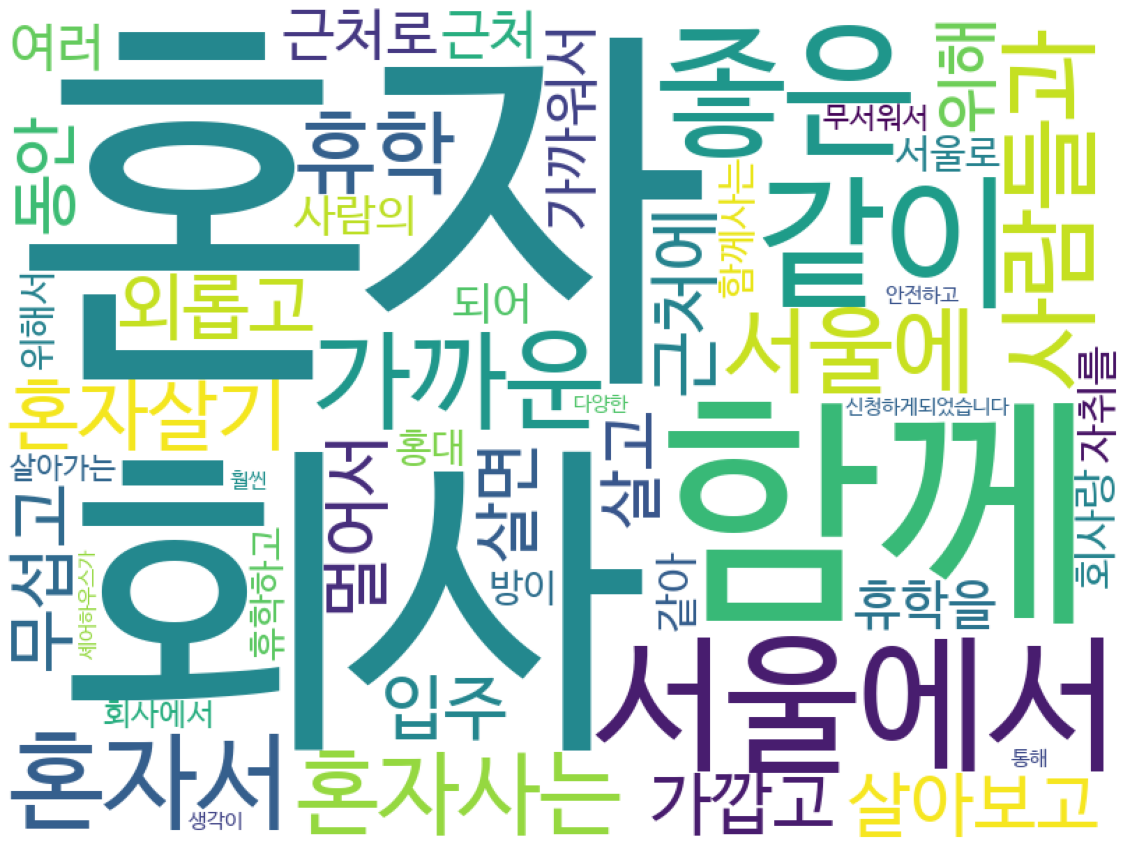

In [60]:
from PIL import Image 
from wordcloud import WordCloud 
import matplotlib 

matplotlib.rcParams['font.family'] = "맑은 고딕 굵게" 
font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf" 

wc = WordCloud(font_path=font_path, background_color="white", width=800, height=600) 
cloud = wc.generate_from_frequencies(dict(common_tag_100)) 
plt.figure(figsize = (20, 32)) 
plt.axis('off') 
plt.imshow(cloud)


In [ ]:
plt.savefig('word_cloud.jpg')

<Figure size 432x288 with 0 Axes>